In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',60)

In [2]:
df = pd.read_csv('DataAfterEDA.csv')

In [3]:
year = pd.DataFrame()
year['issue_d'] = df['issue_d'].values

In [4]:
target = pd.DataFrame()
target['loan_status'] = df['loan_status']
target.replace(['Fully Paid','Charged Off'],[1,0],inplace=True)

# 1 is for loan sanctioned
# 0 is for loan not being sanctioned

In [5]:
e= {'10+ years': 11,
 '< 1 year': 1,
 '1 year': 2,
 '3 years': 4,
 '8 years': 9,
 '9 years': 10,
 '4 years': 5,
 '5 years': 6,
 '6 years': 7,
 '2 years': 3,
 '7 years': 8}
df['emp_length'] = df['emp_length'].map(e)

In [6]:
g = {'B': 2, 'C': 3, 'A': 1, 'E': 5, 'F': 6, 'D': 4, 'G': 7}
df['grade'] = df['grade'].map(g)

In [7]:
df.drop(['issue_d','issue_y','addr_state'],axis=1,inplace=True)

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_avg
0,5000.0,36 months,10.65,162.87,2,11,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,737.0
1,2500.0,60 months,15.27,59.83,3,1,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,742.0
2,2400.0,36 months,15.96,84.33,3,11,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,737.0
3,10000.0,36 months,13.49,339.31,3,11,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,692.0
4,3000.0,60 months,12.69,67.79,2,2,RENT,80000.0,Source Verified,Fully Paid,other,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0,697.0


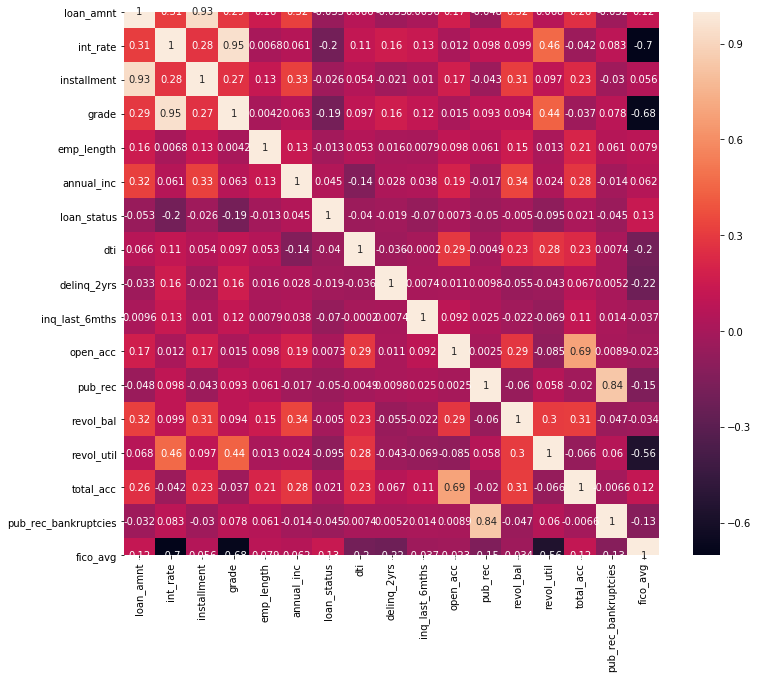

In [9]:
df['loan_status'] = df['loan_status'].replace(['Fully Paid','Charged Off'],[1,0])
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()
df = df.drop('loan_status',axis=1)

In [10]:
df= pd.get_dummies(df,drop_first=True)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
df = df.drop(['int_rate','installment'],axis=1)
df['constant'] = 1
vif = [variance_inflation_factor (df.values,i) for i in range(df.shape[1])]

In [13]:
pd.DataFrame({'vif':vif},index=df.columns)

,vif
loan_amnt,1.993435
grade,3.495671
emp_length,1.129509
annual_inc,1.373083
dti,1.377940
delinq_2yrs,1.136015
inq_last_6mths,1.065228
open_acc,2.156384
pub_rec,3.383757
revol_bal,1.537738


In [14]:
df.drop('constant',axis=1,inplace=True)
df = df.merge(year,left_index=True, right_index=True,how='inner')
df = df.merge(target,left_index=True, right_index=True,how='inner')

In [15]:
test = df[((df['issue_d']=='Dec-2011') | (df['issue_d']== 'Nov-2011') | (df['issue_d']== 'Oct-2011') | (df['issue_d']== 'Sep-2011'))]
test.drop('issue_d',axis=1,inplace=True)
train = df[~ ((df['issue_d']=='Dec-2011') | (df['issue_d']== 'Nov-2011') | (df['issue_d']== 'Oct-2011') | (df['issue_d']== 'Sep-2011'))]
train.drop('issue_d',axis=1,inplace=True)

In [16]:
xtrain = train.drop('loan_status',axis=1)
ytrain = train['loan_status']
xtest = test.drop('loan_status',axis=1)
ytest = test['loan_status']

### Basic Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=7)

In [18]:
# from sklearn.model_selection import GridSearchCV
# params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# grid = GridSearchCV(estimator=log,param_grid=params,cv=10,)

In [19]:
# grid.fit(xtrain,ytrain)

In [20]:
# grid.best_params_

In [21]:
log = LogisticRegression(random_state=7,C=0.1,penalty='l1')

In [22]:
log.fit(xtrain,ytrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
pred = log.predict(xtest)

In [24]:
log.score(xtrain,ytrain)

0.8640408701384311

In [25]:
log.score(xtest,ytest)

0.8422185034664117

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve

In [27]:
f1_score(ytest,pred)

0.9142411642411641

In [28]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.71      0.01      0.01      1326
           1       0.84      1.00      0.91      7040

    accuracy                           0.84      8366
   macro avg       0.78      0.50      0.46      8366
weighted avg       0.82      0.84      0.77      8366



In [29]:
confusion_matrix(ytest,pred)

array([[  10, 1316],
       [   4, 7036]], dtype=int64)

In [30]:
roc_auc_score(ytest,pred)

0.5034866481557658

### Logistic Regression after Increasing the Thershold

In [30]:
y_pred_prob = log.predict_proba(xtest)
y_pred_prob_df = pd.DataFrame(y_pred_prob,columns=['Not Sanctioned','Sanctioned'])
y_pred_prob_df.head()

,Not Sanctioned,Sanctioned
0,0.106359,0.893641
1,0.273046,0.726954
2,0.316239,0.683761
3,0.139148,0.860852
4,0.146502,0.853498


In [64]:
from sklearn.preprocessing import binarize
for i in range(5,10):
    cm2=0
    y_pred_prob_yes=log.predict_proba(xtest)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(ytest,y_pred2)
    f= f1_score(ytest,y_pred2)
    r = roc_auc_score(ytest,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[0,1],'False loan Santioned','\n\n',
          'f1_score: ',f,'ROC_AUC_score: ',r,'\n\n\n')

With 0.5 threshold the Confusion Matrix is  
 [[  10 1316]
 [   4 7036]] 
 with 7046 correct predictions and 1316 False loan Santioned 

 f1_score:  0.9142411642411641 ROC_AUC_score:  0.5034866481557658 



With 0.6 threshold the Confusion Matrix is  
 [[  56 1270]
 [  59 6981]] 
 with 7037 correct predictions and 1270 False loan Santioned 

 f1_score:  0.9130861290955464 ROC_AUC_score:  0.5169257978541066 



With 0.7 threshold the Confusion Matrix is  
 [[ 206 1120]
 [ 313 6727]] 
 with 6933 correct predictions and 1120 False loan Santioned 

 f1_score:  0.903741519446497 ROC_AUC_score:  0.5554471110996846 



With 0.8 threshold the Confusion Matrix is  
 [[ 569  757]
 [1204 5836]] 
 with 6405 correct predictions and 757 False loan Santioned 

 f1_score:  0.8561578522702268 ROC_AUC_score:  0.6290436891539833 



With 0.9 threshold the Confusion Matrix is  
 [[1102  224]
 [4027 3013]] 
 with 4115 correct predictions and 224 False loan Santioned 

 f1_score:  0.5863578865427654 ROC_AUC

Area Under ROC: 65.69988987727959 %
F1 Score: 0.7871092180342362

Confusion Matrix
[[ 820  506]
 [2143 4897]]

Correct Predictions: 5717
False loan Sanctioned: 506


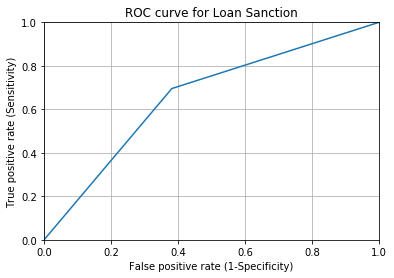

In [32]:
pred_t8 = binarize(y_pred_prob,0.85)[:,1]
fpr,tpr,thre = roc_curve(ytest,pred_t8)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Loan Sanction')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
print("Area Under ROC:",roc_auc_score(ytest,pred_t8)*100,"%")
print("F1 Score:",f1_score(ytest,pred_t8))
print()
print("Confusion Matrix")
conma = confusion_matrix(ytest,pred_t8) 
print(conma)
print()
print("Correct Predictions:",conma[0,0]+conma[1,1])
print("False loan Sanctioned:",conma[0,1])

### Logistic Regression after Over-sampling

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=7,sampling_strategy='minority')

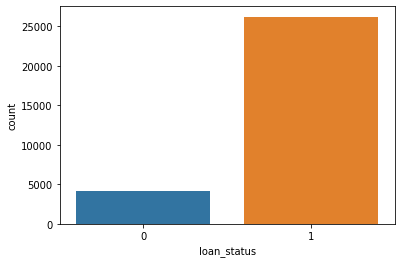

In [34]:
sns.countplot(ytrain)
plt.show()

In [35]:
xtrain_os,ytrain_os = sm.fit_resample(xtrain,ytrain)
xtrain_os = pd.DataFrame(xtrain_os,columns=xtrain.columns)

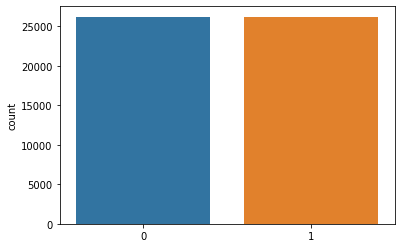

In [36]:
sns.countplot(list(ytrain_os))
plt.show()

In [37]:
log_os = LogisticRegression(random_state=7,penalty='l1',C=0.1)
log_os.fit(xtrain_os,ytrain_os)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
trsc = []
tesc = []
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in c:
    log_os = LogisticRegression(random_state=7,penalty='l1',C=i)
    log_os.fit(xtrain_os,ytrain_os)
    trsc.append(log_os.score(xtrain_os,ytrain_os))
    tesc.append(log_os.score(xtest,ytest))

In [151]:
print("Maximum Testing accuracy is ",round(max(tesc),3),"and value of C for that is",c[tesc.index(max(tesc))])

Maximum Testing accuracy is  0.653 and value of C for that is 0.1


In [38]:
pred_os = log_os.predict(xtest)

In [39]:
log_os.score(xtrain_os,ytrain_os)

0.6530160909021582

In [40]:
log_os.score(xtest,ytest)

0.6547932106143916

In [41]:
confusion_matrix(ytest,pred_os)

array([[ 882,  444],
       [2444, 4596]], dtype=int64)

In [42]:
roc_auc_score(ytest,pred_os)

0.6589996400658166

In [43]:
f1_score(ytest,pred_os)

0.7609271523178809

Area Under ROC: 65.89996400658165 %
F1 Score: 0.7609271523178809

Confusion Matrix
[[ 882  444]
 [2444 4596]]

Correct Predictions: 5478
False loan Sanctioned: 444


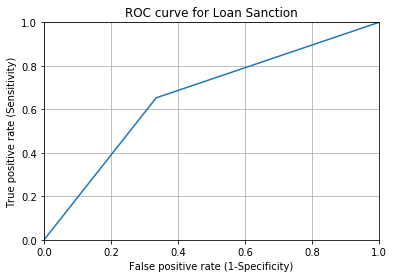

In [44]:
fpr,tpr,thre = roc_curve(ytest,pred_os)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Loan Sanction')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
print("Area Under ROC:",roc_auc_score(ytest,pred_os)*100,"%")
print("F1 Score:",f1_score(ytest,pred_os))
print()
print("Confusion Matrix")
conma = confusion_matrix(ytest,pred_os) 
print(conma)
print()
print("Correct Predictions:",conma[0,0]+conma[1,1])
print("False loan Sanctioned:",conma[0,1])

### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=7,criterion='entropy')
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [46]:
rf.score(xtrain,ytrain)

0.9929795649307844

In [47]:
rf.score(xtest,ytest)

0.8291895768587139

In [48]:
pred_rf = rf.predict(xtest)

In [49]:
roc_auc_score(ytest,pred_rf)

0.5171687534279445

In [50]:
f1_score(ytest,pred_rf)

0.9056329657267385

In [51]:
confusion_matrix(ytest,pred_rf)

array([[  80, 1246],
       [ 183, 6857]], dtype=int64)

Area Under ROC: 51.71687534279445 %
F1 Score: 0.9056329657267385

Confusion Matrix
[[  80 1246]
 [ 183 6857]]

Correct Predictions: 6937
False loan Sanctioned: 1246


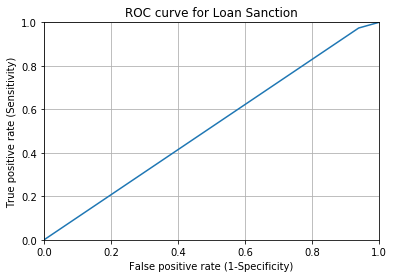

In [52]:
fpr,tpr,thre = roc_curve(ytest,pred_rf)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Loan Sanction')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
print("Area Under ROC:",roc_auc_score(ytest,pred_rf)*100,"%")
print("F1 Score:",f1_score(ytest,pred_rf))
print()
print("Confusion Matrix")
conma = confusion_matrix(ytest,pred_rf) 
print(conma)
print()
print("Correct Predictions:",conma[0,0]+conma[1,1])
print("False loan Sanctioned:",conma[0,1])

### Random Forest Classifier after Increasing the Thershold

In [53]:
rf_pred_prob = rf.predict_proba(xtest)
rf_pred_prob_df = pd.DataFrame(y_pred_prob,columns=['Not Sanctioned','Sanctioned'])
rf_pred_prob_df.head()

,Not Sanctioned,Sanctioned
0,0.106359,0.893641
1,0.273046,0.726954
2,0.316239,0.683761
3,0.139148,0.860852
4,0.146502,0.853498


In [65]:
from sklearn.preprocessing import binarize
for i in range(5,10):
    cm2=0
    rf_pred_prob_yes=rf.predict_proba(xtest)
    rf_pred2=binarize(rf_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(ytest,rf_pred2)
    f= f1_score(ytest,rf_pred2)
    r = roc_auc_score(ytest,rf_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[0,1],'False loan Sanctioned','\n\n',
          'f1_score: ',f,'ROC_AUC_score: ',r,'\n\n\n')

With 0.5 threshold the Confusion Matrix is  
 [[  80 1246]
 [ 183 6857]] 
 with 6937 correct predictions and 1246 False loan Sanctioned 

 f1_score:  0.9056329657267385 ROC_AUC_score:  0.5171687534279445 



With 0.6 threshold the Confusion Matrix is  
 [[ 218 1108]
 [ 550 6490]] 
 with 6708 correct predictions and 1108 False loan Sanctioned 

 f1_score:  0.8867331602677961 ROC_AUC_score:  0.5431396116138762 



With 0.7 threshold the Confusion Matrix is  
 [[ 433  893]
 [1355 5685]] 
 with 6118 correct predictions and 893 False loan Sanctioned 

 f1_score:  0.8349243648112792 ROC_AUC_score:  0.5670372060537501 



With 0.8 threshold the Confusion Matrix is  
 [[ 767  559]
 [2712 4328]] 
 with 5095 correct predictions and 559 False loan Sanctioned 

 f1_score:  0.7257483021715435 ROC_AUC_score:  0.5966020499108734 



With 0.9 threshold the Confusion Matrix is  
 [[1108  218]
 [4794 2246]] 
 with 3354 correct predictions and 218 False loan Sanctioned 

 f1_score:  0.47264309764309764 R

Area Under ROC: 59.66020499108734 %
F1 Score: 0.7257483021715435

Confusion Matrix
[[ 767  559]
 [2712 4328]]

Correct Predictions: 5095
False loan Sanctioned: 559


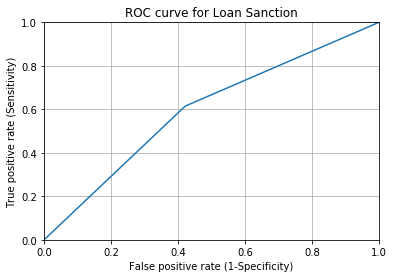

In [55]:
pred_rft = binarize(rf_pred_prob,0.8)[:,1]
fpr,tpr,thre = roc_curve(ytest,pred_rft)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Loan Sanction')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
print("Area Under ROC:",roc_auc_score(ytest,pred_rft)*100,"%")
print("F1 Score:",f1_score(ytest,pred_rft))
print()
print("Confusion Matrix")
conma = confusion_matrix(ytest,pred_rft) 
print(conma)
print()
print("Correct Predictions:",conma[0,0]+conma[1,1])
print("False loan Sanctioned:",conma[0,1])

### Random Forest Classifier after Over- Sampling

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=7,criterion='entropy')
rf1.fit(xtrain_os,ytrain_os)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [57]:
rf1.score(xtrain_os,ytrain_os)

0.9967398764584763

In [58]:
rf1.score(xtest,ytest)

0.8201051876643557

In [59]:
pred_rf_os = rf1.predict(xtest)

In [60]:
roc_auc_score(ytest,pred_rf_os)

0.5344188134169752

In [61]:
f1_score(ytest,pred_rf_os)

0.8991219250620014

In [62]:
confusion_matrix(ytest,pred_rf_os)

array([[ 154, 1172],
       [ 333, 6707]], dtype=int64)

Area Under ROC: 53.44188134169752 %
F1 Score: 0.8991219250620014

Confusion Matrix
[[ 154 1172]
 [ 333 6707]]

Correct Predictions: 6861
False loan Sanctioned: 1172


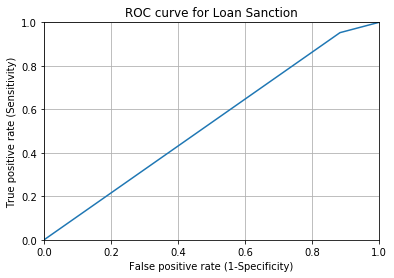

In [63]:
fpr,tpr,thre = roc_curve(ytest,pred_rf_os)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Loan Sanction')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
print("Area Under ROC:",roc_auc_score(ytest,pred_rf_os)*100,"%")
print("F1 Score:",f1_score(ytest,pred_rf_os))
print()
print("Confusion Matrix")
conma = confusion_matrix(ytest,pred_rf_os) 
print(conma)
print()
print("Correct Predictions:",conma[0,0]+conma[1,1])
print("False loan Sanctioned:",conma[0,1])